In [75]:
# Import necessary things
import numpy as np
import matplotlib.pyplot as plt
import pyart
%matplotlib inline

In [76]:
#filename = '/home/hunzinger/data/hsrhi/cor-hsrhi-cacti-a_CSAPR2_20181005162239_00.h5'
filename = '/home/hunzinger/data/hsrhi_cf/corcsapr2cfrhsrhiM1.a1.20181020.000716.nc'
#filename = '/home/hunzinger/data/hsrhi/cor-hsrhi-cacti-a_CSAPR2_20181005160739_00.h5'
#filename = '/home/hunzinger/data/hsrhi_raw/corcsaprM1.00.20181003.153200.raw.cor-hsrhi-cacti-a_CSAPR2_20181001183740_00.h5'
#radar = pyart.aux_io.read_gamic(filename, file_field_names=True) 
radar = pyart.io.cfradial.read_cfradial(filename, file_field_names=True) 

In [81]:
print(radar.metadata)
print(radar.sweep_number)
print(radar.elevation['data'])
radar.fields

{'command_line': 'sapr2cfr_ingest -n csapr2cfr -s cor -f M1 -F', 'Conventions': 'ARM-1.2 CF/Radial-1.4 instrument_parameters radar_parameters radar_calibration', 'process_version': 'ingest-sapr2cfr-1.0-1.el7', 'dod_version': 'csapr2cfrhsrhi-a1-1.0', 'input_source': '/data/collection/cor/corcsaprM1.00/corcsaprM1.00.20181020.021001.raw.cor-hsrhi-cacti-a_CSAPR2_20181020000716_00.h5', 'site_id': 'cor', 'platform_id': 'csapr2cfrhsrhi', 'facility_id': 'M1', 'data_level': 'a1', 'location_description': 'Cordoba, Argentina; Mobile Facility (CACTI), Cordoba, Argentina', 'datastream': 'corcsapr2cfrhsrhiM1.a1', 'comment': '', 'institution': 'Department of Energy Atmospheric Radiation Measurement Program', 'instrument_name': 'CSAPR2', 'radar_version': '8', 'references': 'See Instrument Handbook', 'scan_mode': 'hsrhi', 'sdp_name': 'UNKNOWN SDP', 'sdp_version': 'HW protocol: 2.1.0; PCI DSP firmware: 5.0.20; PCI FPGA firmware: 5.0.3; IFD FPGA firmware: 5.0.6; ENIGMA software: 1.2.1', 'site_name': 'cor

{'attenuation_corrected_differential_reflectivity': {'long_name': 'Rainfall attenuation-corrected differential reflectivity',
  'units': 'dB',
  'coordinates': 'elevation azimuth range',
  'standard_name': 'radar_differential_reflectivity_hv',
  '_FillValue': -32767,
  'data': masked_array(
    data=[[-3.323343515396118, -6.222846031188965, -0.8808862566947937,
           ..., 0.9912412166595459, 1.9590442180633545, 10.33918285369873],
          [3.8145694732666016, -3.6338999271392822, -2.5938291549682617,
           ..., -0.8808862566947937, 0.8320566415786743,
           -3.546983242034912],
          [6.77657413482666, -4.569475173950195, -3.4405345916748047, ...,
           -0.8506119251251221, 4.103641033172607, 3.230567455291748],
          ...,
          [1.5010223388671875, -4.537247657775879, -4.6524858474731445,
           ..., -3.7969908714294434, 6.256050109863281, 3.1016571521759033],
          [5.008942127227783, -8.245368957519531, -2.449293613433838, ...,
           6.

In [83]:
#uzh = radar.fields['UZh']['data']
#uzv = radar.fields['UZv']['data']
#snrh = radar.fields['SNRh']['data']
#snrv = radar.fields['SNRv']['data']
#sph = radar.fields['SIGPOWh']['data']
#spv = radar.fields['SIGPOWv']['data']
#sqih = radar.fields['SQIh']['data'] #quality index
#sqiv = radar.fields['SQIv']['data'] #quality index
uzh = radar.fields['reflectivity']['data']
uzv = radar.fields['reflectivity_v']['data']
snrh = radar.fields['signal_to_noise_ratio_copolar_h']['data']
snrv = radar.fields['signal_to_noise_ratio_copolar_v']['data']
#sph = radar.fields['SIGPOWh']['data']
#spv = radar.fields['SIGPOWv']['data']
sqih = radar.fields['normalized_coherent_power']['data'] #quality index
sqiv = radar.fields['normalized_coherent_power_v']['data'] #quality index
r = radar.range['data']
print(uzh.shape)
#top30 = np.where(radar.elevation['data'] > 75.)

#top = np.where(radar.elevation['data'] < 105.)
#x = np.where(radar.elevation['data'] > 89.)
#print(top30)
#print(top)
#radar.elevation['data'][x]
#print(radar.sweep_start_ray_index['data'])
#radar.elevation['data'][radar.sweep_start_ray_index['data']]
#radar.elevation['data'][0:357]
#radar.elevation['data'][358:724]
print(r.shape)


(2172, 1100)
(1100,)


In [84]:
# Create noise vairable
# Subtract range term from UZ
noise_h = np.empty(uzh.shape)
noise_v = np.empty((uzv.shape))
for i in range(0,len(radar.elevation['data'])):
    for j in range(0,len(radar.range['data'])):
        noise_h[i,j] = uzh[i,j] - (20*np.log10(r[j]))
        noise_v[i,j] = uzv[i,j] - (20*np.log10(r[j]))

/home/hunzinger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/home/hunzinger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/home/hunzinger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys
/home/hunzinger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Warning: converting a masked element to nan.
  


In [86]:
top30idx = []
for i in range(0,len(radar.elevation['data'])):
    if radar.elevation['data'][i] > 82.5 and radar.elevation['data'][i] < 97.5:
        top30idx.append(i)
        
print(len(top30idx))

r_above5idx = np.where(r > 5000.)[0]
r_above5 = r[r_above5idx]
#print(r_above5idx)
#print(top30idx)
#radar.elevation['data'][top30idx]
#np.nanmax(radar.gate_altitude['data'])
uzh[top30idx[23],r_above5idx[1000]]
#sqih[top30idx[23],r_above5idx[1000]]
uzh
snrh
#for j in r_above5idx:
#    print(j)

180


masked_array(
  data=[[67.11857604980469, 75.64720153808594, 61.855377197265625, ...,
         -4.489372253417969, -4.744926452636719, -2.7451133728027344],
        [69.07783508300781, 72.18707275390625, 62.59364318847656, ...,
         -9.841815948486328, -9.438201904296875, -9.33273696899414],
        [68.26856994628906, 67.18145751953125, 67.80006408691406, ...,
         -8.973743438720703, -8.659370422363281, -5.947654724121094],
        ...,
        [65.9564208984375, 57.1722412109375, 51.5399055480957, ...,
         -11.081050872802734, -3.7673301696777344, -6.90496826171875],
        [68.13066101074219, 62.00749206542969, 53.21723556518555, ...,
         -5.331077575683594, --, --],
        [70.27041625976562, 64.58940124511719, 56.799049377441406, ...,
         -7.95355224609375, -6.310703277587891, -15.186145782470703]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fa

In [87]:
# Pull all noise values from Zh and Zv and bin them in 1 dB increments
uzh_n = []
uzv_n = []
uzvh_n = []
for i in top30idx:
    for j in r_above5idx:
        if uzh[i,j] <= -10. and uzv[i,j] <= -10. and sqih[i,j] < 0.3 and sqiv[i,j] < 0.3:
            uzh_n.append(uzh[i,j] - (20*np.log10(r[j])))
            uzv_n.append(uzv[i,j] - (20*np.log10(r[j])))
            uzvh_n.append((uzh[i,j]-(20*np.log10(r[j]))) - (uzv[i,j]-(20*np.log10(r[j]))))

In [88]:
# Subtract range term
#noise_h = np.empty(uzh_n.shape)
#noise_v = np.empty((u.shape))
#for i in range(0,len(radar.elevation['data'])):
#    for j in range(0,len(radar.range['data'])):
#        noise_h[i,j] = uzh[i,j] - (20*np.log10(r[j]))
#        noise_v[i,j] = uzv[i,j] - (20*np.log10(r[j]))

74944 74944


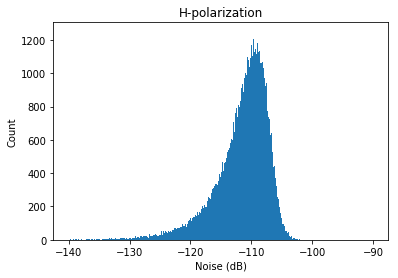

[-109.625]


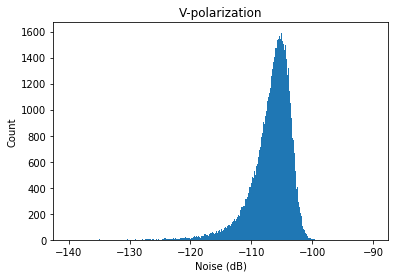

[-105.125]


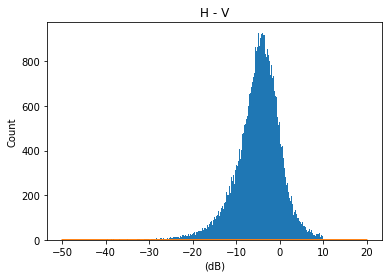

[-4.875]


In [89]:
# Subtract range term
print(len(uzv_n), len(uzh_n))
b = np.arange(401)*0.125-140
hist, bin_edges = np.histogram(uzh_n,bins=np.arange(9)*2.5-30)
hist
bin_edges
n, bins, patches = plt.hist(uzh_n, bins=b)
#plt.yscale('log', nonposy='clip')
plt.title('H-polarization')
plt.ylabel('Count')
plt.xlabel('Noise (dB)')
plt.show()
pk = np.where(n == np.max(n))
peak = bins[pk]
print(peak)
#plt.hist(hist)
n, bins, pathces = plt.hist(uzv_n, bins=b)
plt.title('V-polarization')
plt.ylabel('Count')
plt.xlabel('Noise (dB)')
#plt.yscale('log', nonposy='clip')
plt.show()
pk = np.where(n == np.max(n))
peak = bins[pk]
print(peak)
bb = np.arange(401)*0.125-40
n, bins, pathces = plt.hist(uzvh_n, bins=bb)
plt.title('H - V')
plt.ylabel('Count')
plt.xlabel('(dB)')
#plt.yscale('log', nonposy='clip')
xt = plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, len(uzvh_n))
from scipy import stats
m,s = stats.norm.fit(uzvh_n)
pdf_g = stats.norm.pdf(lnspc,m,s)
plt.plot(lnspc, pdf_g)
plt.show()
pk = np.where(n == np.max(n))
peak = bins[pk]
print(peak)
#print(lnspc)
#print(pdf_g)
# the histogram of the data
#n, bins, patches = plt.hist(datos, 60, normed=1, facecolor='green', alpha=0.75)
#from scipy.stats import norm
#import matplotlib.mlab as mlab
#(mu, sigma) = norm.fit(uzh_n)
# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=2)

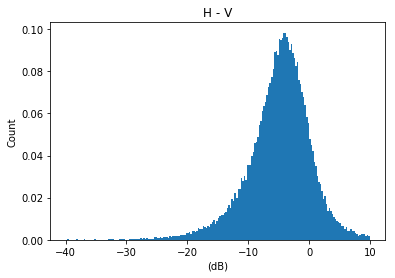

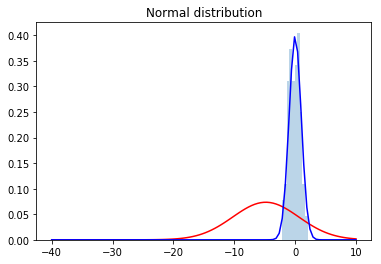

array([-4.])

In [90]:
bb = np.arange(201)*0.25-40
n, bins, pathces = plt.hist(uzvh_n, bins=bb, density=True)
plt.title('H - V')
plt.ylabel('Count')
plt.xlabel('(dB)')
#plt.yscale('log', nonposy='clip')
#xt = plt.xticks()[0]
#xmin, xmax = min(xt), max(xt)
#lnspc = np.linspace(xmin, xmax, len(uzvh_n))
#from scipy import stats
#m,s = stats.norm.fit(uzvh_n)
#pdf_g = stats.norm.pdf(lnspc,m,s)
#plt.plot(lnspc, pdf_g)
plt.show()
#print(lnspc)
#print(pdf_g)
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = norm.rvs(loc=0,scale=1,size=150) 

param = norm.fit(samp) # distribution fitting
param = norm.fit(uzvh_n)
# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(-40,10,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution')
plot(x,pdf_fitted,'r-',x,pdf,'b-')
xx =hist(samp,normed=1,alpha=.3)
show()

pk = np.where(n == np.max(n))
peak = bins[pk]
peak

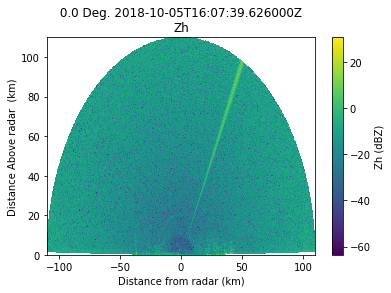

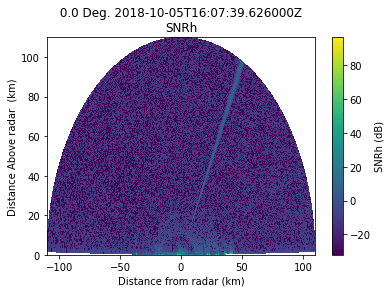

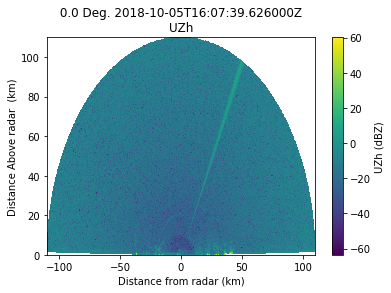

In [105]:
display = pyart.graph.RadarDisplay(radar)
display.plot_rhi('Zh')
plt.show()
display.plot('SNRh')
plt.show()
display.plot('UZh')
plt.show()